In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
file_name = 'sample4.xlsx'
file_path = '../' + file_name
data = pd.read_excel(file_path)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.mean())

# Objective function
def objective_function(x):
    diffs = data_values - x
    return np.sum(diffs**2)

# Bee algorithm parameters
num_bees = 30
num_elite_sites = 5
num_best_sites = 10
elite_bees = 10
best_bees = 5
max_iterations = 100
search_radius = 0.1

# Initialize bee positions
data_values = data.values
bee_positions = np.random.uniform(data_values.min(), data_values.max(), (num_bees, data_values.shape[1]))

# Store best fitness values over iterations for plotting
best_fitness_values = []

# Main loop
for iteration in range(max_iterations):
    fitness = np.apply_along_axis(objective_function, 1, bee_positions)
    sorted_indices = np.argsort(fitness)
    bee_positions = bee_positions[sorted_indices]
    best_fitness = fitness[sorted_indices[0]]
    best_fitness_values.append(best_fitness)
    
    new_positions = []
    for i in range(num_elite_sites):
        for _ in range(elite_bees):
            new_position = bee_positions[i] + np.random.uniform(-search_radius, search_radius, data_values.shape[1])
            new_positions.append(new_position)
    
    for i in range(num_elite_sites, num_best_sites):
        for _ in range(best_bees):
            new_position = bee_positions[i] + np.random.uniform(-search_radius, search_radius, data_values.shape[1])
            new_positions.append(new_position)
    
    num_scouts = max(0, num_bees - len(new_positions))
    scout_positions = np.random.uniform(data_values.min(), data_values.max(), (num_scouts, data_values.shape[1]))
    new_positions.extend(scout_positions)
    
    bee_positions = np.array(new_positions)

best_bee = bee_positions[0]
final_best_fitness = objective_function(best_bee)

print("Best Position:", best_bee)
print("Best Fitness:", final_best_fitness)

Best Position: [1.09423353 3.78801888 4.34027643 3.96791899 4.34640219 5.53881033
 3.17474574 3.99415696 5.13727127 5.06341412 3.97516636]
Best Fitness: 32415.92735247637


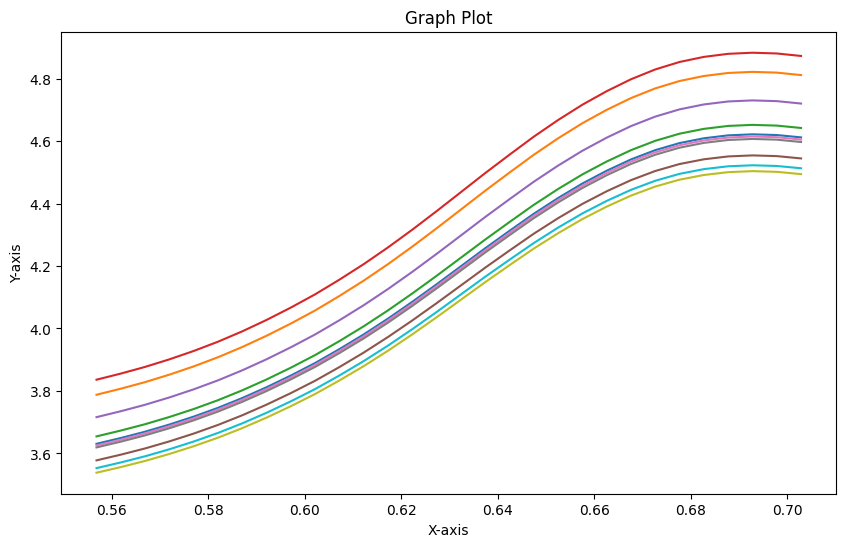

Range where graph is at its peak: (0.667572, 0.70282)


In [12]:
# Plot the graph and calculate the peak range
rows = data.iloc[190:220]
x_axis = rows.iloc[:, 0].values
y_axis = rows.iloc[:, 1:].values

plt.figure(figsize=(10, 6))
for i in range(y_axis.shape[1]):
    plt.plot(x_axis, y_axis[:, i])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph Plot')
plt.show()

# Calculate the sum of y-values for each x-value
y_sums = y_axis.sum(axis=1)

# Find the index of the maximum sum
max_index = np.argmax(y_sums)
start_index = max_index - 5 if max_index - 5 >= 0 else 0
end_index = max_index + 5 if max_index + 5 < len(x_axis) else len(x_axis) - 1

start_value = x_axis[start_index]
end_value = x_axis[end_index]
print("Range where graph is at its peak: ({}, {})".format(start_value, end_value))

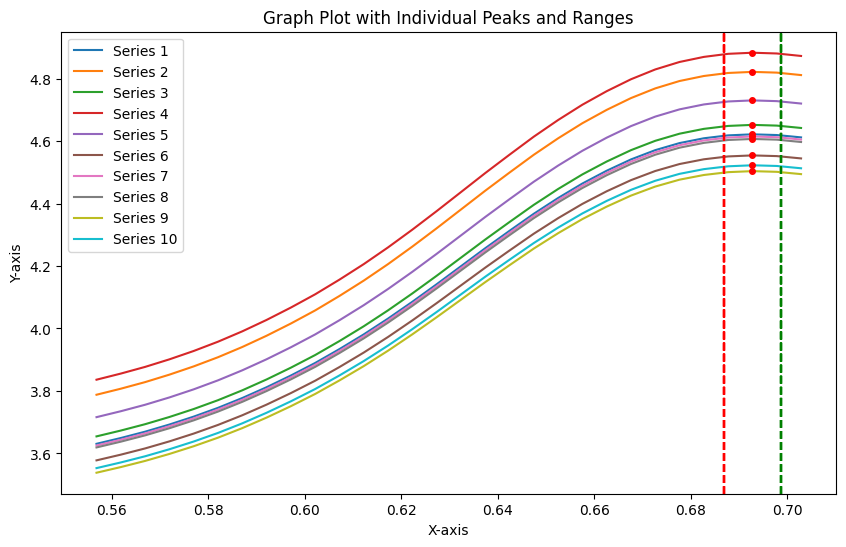

In [13]:
# Assuming 'data' is your original dataset (not provided in the question)

# Extract rows and columns as before
rows = data.iloc[190:220]
x_axis = rows.iloc[:, 0].values
y_axis = rows.iloc[:, 1:].values

# Plot the graph with markers and peak identification for each line individually
plt.figure(figsize=(10, 6))

for i in range(y_axis.shape[1]):
    # Plot each line with markers
    plt.plot(x_axis, y_axis[:, i], marker='', linestyle='-', label=f'Series {i+1}')

    # Find and mark the peak for the current line
    y_values = y_axis[:, i]  
    max_index = np.argmax(y_values)
    max_x = x_axis[max_index]
    max_y = y_values[max_index]
    plt.plot(max_x, max_y, marker='.', markersize=8, color='red')  # Mark the peak with a circle

    # Narrow the range around the peak (adjust window size as needed)
    window_size = 0.03   # Adjust this to control the width of the range
    start_value = max_x - window_size / 5
    end_value = max_x + window_size / 5
    
    # Draw vertical lines around the peak range (similar to your image)
    plt.axvline(x=start_value, color='red', linestyle='--')
    plt.axvline(x=end_value, color='green', linestyle='--')
    
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph Plot with Individual Peaks and Ranges')
plt.legend()
plt.show()

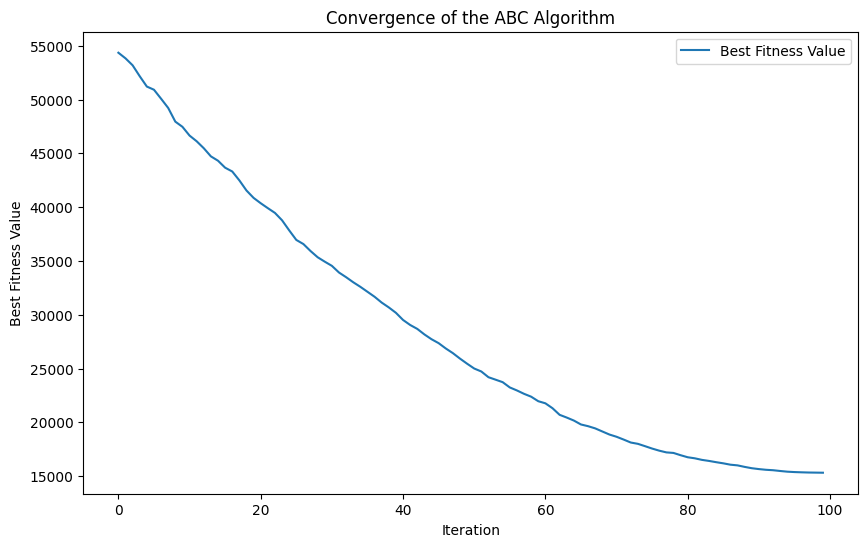

In [14]:
# Convergence graph

plt.figure(figsize=(10, 6))
plt.plot(best_fitness_values, label='Best Fitness Value')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Value')
plt.title('Convergence of the ABC Algorithm')
plt.legend()
plt.show()

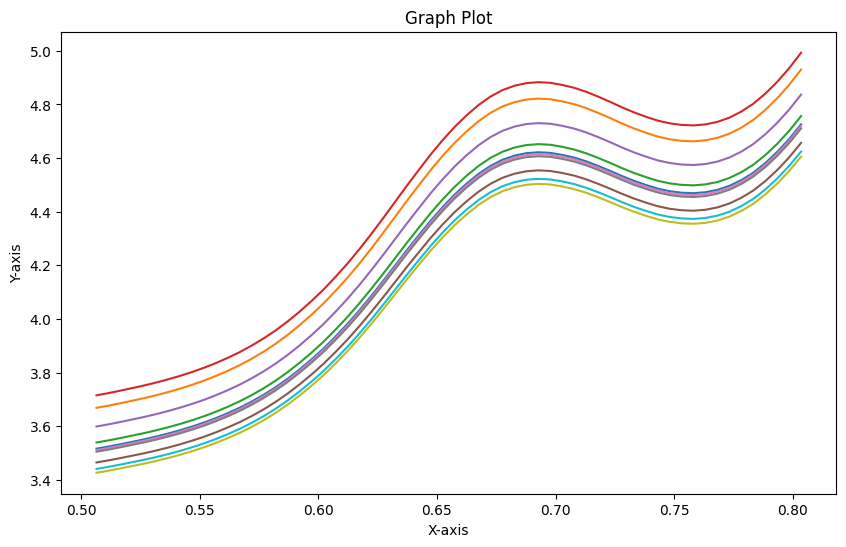

In [15]:
# Full graph 

rows = data.iloc[180:240]
x_axis = rows.iloc[:, 0].values
y_axis = rows.iloc[:, 1:].values

plt.figure(figsize=(10, 6))
for i in range(y_axis.shape[1]):
    plt.plot(x_axis, y_axis[:, i])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph Plot')
plt.show()